In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [17]:
df=pd.read_csv("car_prices.csv")
df.head()

,make,model,year,mileage,price,color,state,date
0,Chevrolet,Cruze,2011,99157,37488,white,TX,2023-09-26 23:02:01.647970
1,Toyota,Cruze,2017,19882,34176,red,IL,2023-08-08 23:02:01.648413
2,Chevrolet,Altima,2011,77718,40297,blue,CA,2023-02-25 23:02:01.648422
3,Nissan,Fusion,2012,83613,43492,silver,TX,2023-04-25 23:02:01.648425
4,Ford,Cruze,2016,95349,26655,red,NY,2023-12-14 23:02:01.648426


In [31]:
df.shape

(10000, 7)

In [18]:
df.shape
df.columns

Index(['make     ', ' model ', ' year', ' mileage', ' price', ' color ',
       ' state', ' date'],
      dtype='object')

In [19]:
df.drop(" date",axis=1,inplace=True)
df.head()

,make,model,year,mileage,price,color,state
0,Chevrolet,Cruze,2011,99157,37488,white,TX
1,Toyota,Cruze,2017,19882,34176,red,IL
2,Chevrolet,Altima,2011,77718,40297,blue,CA
3,Nissan,Fusion,2012,83613,43492,silver,TX
4,Ford,Cruze,2016,95349,26655,red,NY


In [20]:
prices=df[' price']

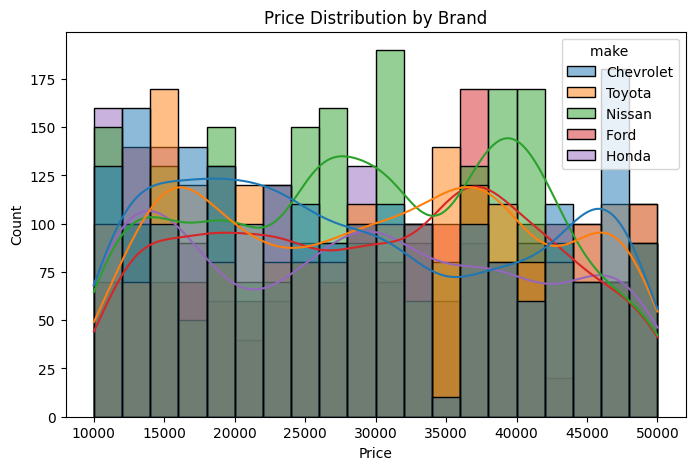

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x=' price', hue='make     ', kde=True, bins=20)
plt.title("Price Distribution by Brand")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


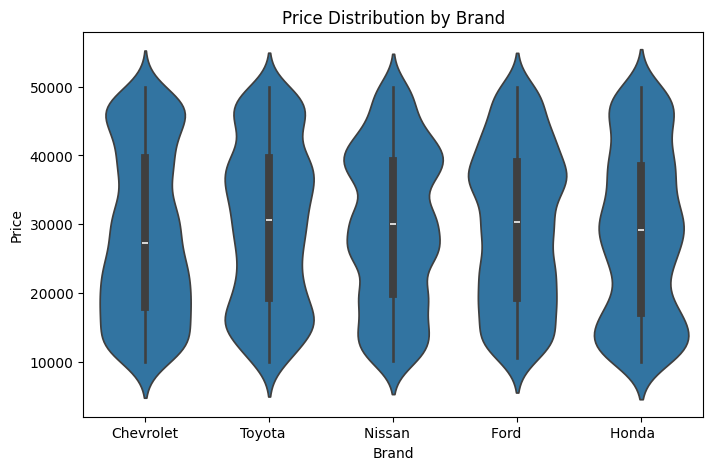

In [22]:
plt.figure(figsize=(8,5))
sns.violinplot(data=df, x='make     ', y=' price')
plt.title("Price Distribution by Brand")
plt.xlabel("Brand")
plt.ylabel("Price")
plt.show()


In [23]:
# Features (all except 'price')
X = df.drop([" price"], axis=1)

# Target variable
y = df[" price"]

In [24]:
X_train ,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

categorical_cols = ['make     ', ' model ', ' color ', ' state']
numerical_cols = [' year', ' mileage']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

model.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('regressor', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('num', ...), ('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformer

In [26]:

# Predictions
y_pred = model.predict(X_test)

In [27]:
y_pred[0:10]

array([15820. , 10539. , 10247. , 25583.4, 22564. , 41239. , 21604. ,
       37310. , 30488. , 18993. ])

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)   # ✅ RMSE is often used in regression
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)
accuracy = r2 * 100
print(f"Accuracy: {accuracy:.2f}%")


Mean Absolute Error (MAE): 21.474029999999978
Mean Squared Error (MSE): 5284.556720099986
Root Mean Squared Error (RMSE): 72.69495663455606
R^2 Score: 0.9999592027390822
Accuracy: 100.00%


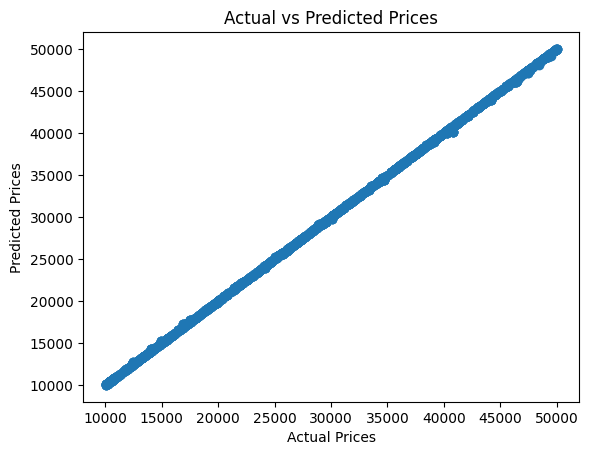

In [29]:
# Plot 
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

In [30]:
# Sample data for prediction
sample_data = pd.DataFrame({
    'make     ': ['honda'],
    ' model ': ['Camry'],
    ' color ': ['red'],
    ' state': ['CA'],
    ' year': [2023],
    ' mileage': [10000]
})

# Predict the price
predicted_price = model.predict(sample_data)
print(f"Predicted price for the sample car: ${predicted_price[0]:.2f}")

Predicted price for the sample car: $23330.04
